<a href="https://colab.research.google.com/github/ruchithareddy269/DM--Assignment-5/blob/main/2_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

from google.colab import files
uploaded = files.upload()


Saving Sales-Superstore.csv to Sales-Superstore.csv


**EDA**

In [7]:
import pandas as pd
df = pd.read_csv('Sales-Superstore.csv')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


convert to dateime

In [8]:
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index of the DataFrame
df.set_index('Order Date', inplace=True)

# Sort the DataFrame by the index
df.sort_index(inplace=True)

# Display the first few rows of the modified dataset
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,1/7/2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,741,CA-2014-112326,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,742,CA-2014-112326,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,1/12/2014,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


visualize

<ipython-input-12-1ad268d8250e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sales = df.groupby(df.index).sum()['Sales']


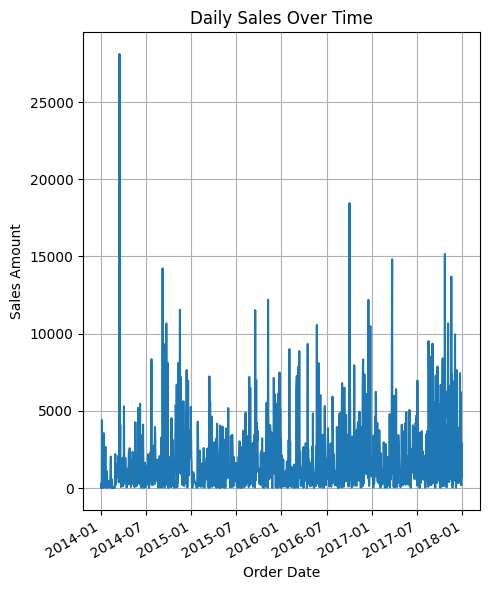

In [12]:
import matplotlib.pyplot as plt

# Group by the index (Order Date) and sum the sales for each day
daily_sales = df.groupby(df.index).sum()['Sales']

# Plot the daily sales
plt.figure(figsize=(5, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.ylabel('Sales Amount')
plt.xlabel('Order Date')
plt.grid(True)
plt.tight_layout()
plt.show()


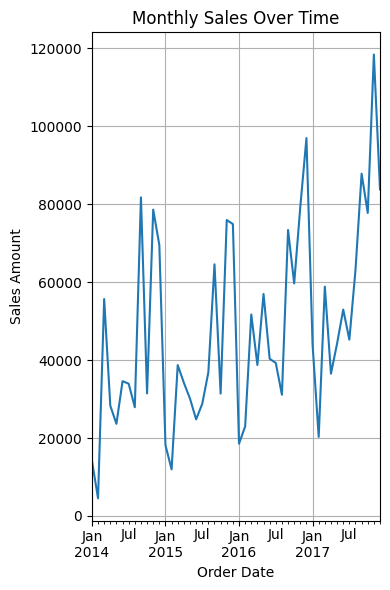

In [18]:


monthly_sales = daily_sales.resample('M').sum()

# Plot the monthly sales
plt.figure(figsize=(4, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales Amount')
plt.xlabel('Order Date')
plt.grid(True)
plt.tight_layout()


plot time series

<Axes: xlabel='Order Date'>

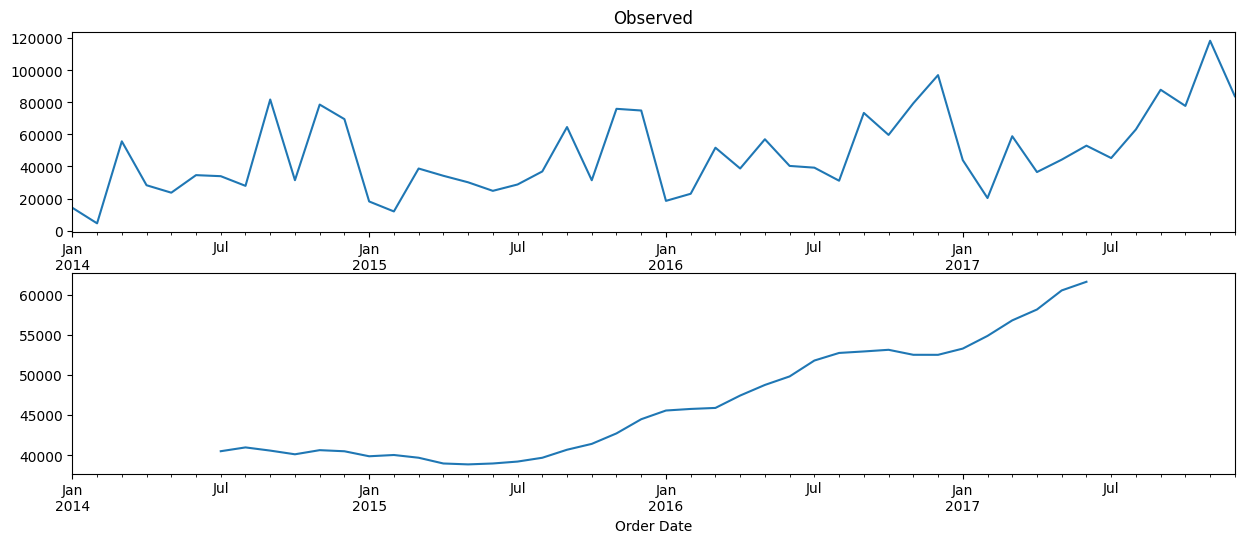

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the monthly sales data
result = seasonal_decompose(monthly_sales, model='additive')

# Plot the decomposed components
plt.figure(figsize=(15, 12))
plt.subplot(4, 1, 1)
result.observed.plot(ax=plt.gca())
plt.title('Observed')
plt.subplot(4, 1, 2)
result.trend.plot(ax=plt.gca())


**Further Analysis**

In [22]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result_adf = adfuller(monthly_sales)

# Extract the test statistic and p-value
test_statistic = result_adf[0]
p_value = result_adf[1]

test_statistic, p_value

(-4.493767844002666, 0.00020180198458237704)

**Building the ARIMA Model**

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Define the p, d, q ranges to test
p_range = range(0, 3)  # based on PACF
d_range = range(0, 2)  # we'll test with no differencing and first order differencing
q_range = range(0, 3)  # based on ACF

best_aic = float('inf')
best_order = None

# Grid search for the best ARIMA parameters
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = ARIMA(monthly_sales, order=(p, d, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, d, q)
            except:
                continue

best_order, best_aic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


((0, 1, 1), 1084.6123904649346)

**Forecasting with the Model**

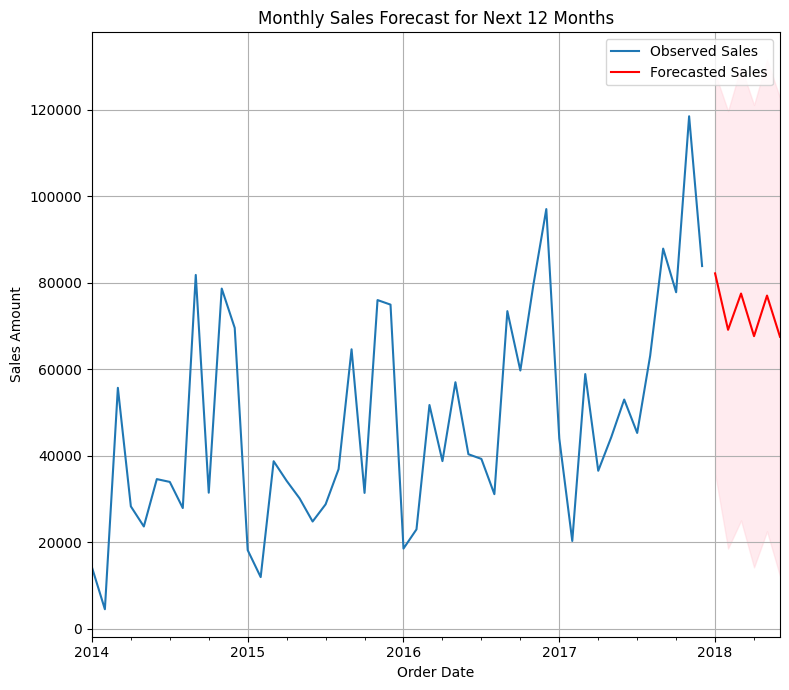

In [26]:
# Forecast the next 12 months
forecast_horizon = 6
forecast = results.get_forecast(steps=forecast_horizon)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the past sales data along with the forecast and confidence intervals
plt.figure(figsize=(8, 7))
monthly_sales.plot(label='Observed Sales', legend=True)
mean_forecast.plot(label='Forecasted Sales', legend=True, color='red')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly Sales Forecast for Next 12 Months')
plt.ylabel('Sales Amount')
plt.xlabel('Order Date')
plt.grid(True)
plt.tight_layout()
plt.show()